In [102]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [103]:
train = pd.read_csv("./Dataset/housePricePred/train.csv")

test = pd.read_csv("./Dataset/housePricePred/Test_Data.csv")

In [104]:
# train

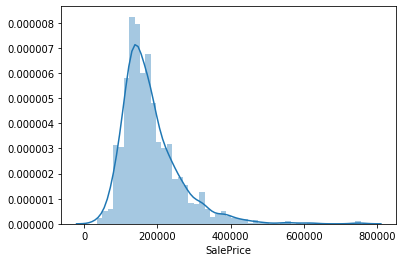

In [105]:
sns.distplot(train['SalePrice'])

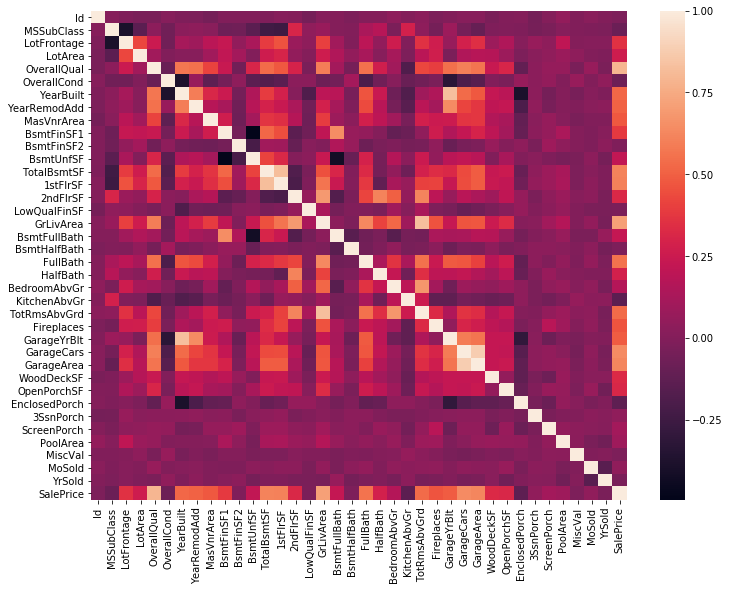

In [106]:
corrmat = train.corr()
f, vx = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat)

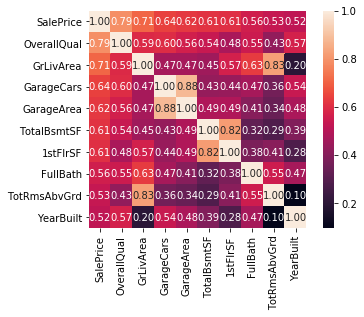

In [107]:
k=10
cols = corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)


In [108]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

In [109]:
train = train.fillna(train.mean())

In [110]:
from sklearn.ensemble import IsolationForest

In [111]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.000000,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.000000,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,70.049958,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.000000,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.000000,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [112]:
cols = ['SalePrice','OverallQual', 'GrLivArea', 'GarageCars', 'FullBath', 'YearBuilt']
train = train[cols]

In [113]:
scale = StandardScaler()
X_train = train[['OverallQual', 'GrLivArea', 'GarageCars', 'FullBath', 'YearBuilt']]
X_train = scale.fit_transform(X_train)
y_train = train['SalePrice'].values

In [114]:
X_train.shape

(1460, 5)

In [115]:
# neural network
from keras.models import Sequential
from keras.layers import Dense

In [116]:
model = Sequential()

model.add(Dense(100,activation='relu',input_dim=X_train.shape[1],kernel_initializer='normal'))
model.add(Dense(25,activation='relu',kernel_initializer='normal'))
model.add(Dense(1,kernel_initializer='normal'))

model.compile(optimizer='adam', loss='mean_squared_error')

In [117]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 100)               600       
_________________________________________________________________
dense_17 (Dense)             (None, 25)                2525      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 26        
Total params: 3,151
Trainable params: 3,151
Non-trainable params: 0
_________________________________________________________________


In [118]:
hist = model.fit(X_train,y_train,epochs=650,batch_size=32)

Epoch 1/650
1460/1460 [==============================] - 0s 238us/step - loss: 39039186321.1836
Epoch 2/650
1460/1460 [==============================] - 0s 34us/step - loss: 39038065217.9288
Epoch 3/650
1460/1460 [==============================] - 0s 34us/step - loss: 39032582671.4301
Epoch 4/650
1460/1460 [==============================] - 0s 43us/step - loss: 39017729907.7260
Epoch 5/650
1460/1460 [==============================] - 0s 48us/step - loss: 38987762163.3753
Epoch 6/650
1460/1460 [==============================] - 0s 41us/step - loss: 38937998220.9753
Epoch 7/650
1460/1460 [==============================] - 0s 36us/step - loss: 38862593565.4575
Epoch 8/650
1460/1460 [==============================] - 0s 39us/step - loss: 38757325153.4904
Epoch 9/650
1460/1460 [==============================] - 0s 39us/step - loss: 38618393995.5726
Epoch 10/650
1460/1460 [==============================] - 0s 55us/step - loss: 38441424968.9425
Epoch 11/650
1460/1460 [========================

1460/1460 [==============================] - 0s 43us/step - loss: 3534927466.6082
Epoch 87/650
1460/1460 [==============================] - 0s 41us/step - loss: 3507016113.4466
Epoch 88/650
1460/1460 [==============================] - 0s 40us/step - loss: 3480460438.7945
Epoch 89/650
1460/1460 [==============================] - 0s 37us/step - loss: 3451758879.5616
Epoch 90/650
1460/1460 [==============================] - 0s 33us/step - loss: 3423363521.5781
Epoch 91/650
1460/1460 [==============================] - 0s 33us/step - loss: 3395207625.9945
Epoch 92/650
1460/1460 [==============================] - 0s 33us/step - loss: 3368577175.4959
Epoch 93/650
1460/1460 [==============================] - 0s 32us/step - loss: 3340097705.7315
Epoch 94/650
1460/1460 [==============================] - 0s 33us/step - loss: 3313456783.7808
Epoch 95/650
1460/1460 [==============================] - 0s 31us/step - loss: 3283421569.7534
Epoch 96/650
1460/1460 [==============================] - 0s 33

1460/1460 [==============================] - 0s 38us/step - loss: 1762218487.5836
Epoch 172/650
1460/1460 [==============================] - 0s 40us/step - loss: 1754526820.9973
Epoch 173/650
1460/1460 [==============================] - 0s 35us/step - loss: 1747993200.2192
Epoch 174/650
1460/1460 [==============================] - 0s 33us/step - loss: 1740942621.1068
Epoch 175/650
1460/1460 [==============================] - 0s 33us/step - loss: 1734099687.8027
Epoch 176/650
1460/1460 [==============================] - 0s 33us/step - loss: 1727984590.9041
Epoch 177/650
1460/1460 [==============================] - 0s 33us/step - loss: 1721309293.0630
Epoch 178/650
1460/1460 [==============================] - 0s 33us/step - loss: 1715920768.7014
Epoch 179/650
1460/1460 [==============================] - 0s 33us/step - loss: 1709572942.2027
Epoch 180/650
1460/1460 [==============================] - 0s 33us/step - loss: 1706839629.5014
Epoch 181/650
1460/1460 [=============================

1460/1460 [==============================] - 0s 35us/step - loss: 1532386817.0521
Epoch 257/650
1460/1460 [==============================] - 0s 41us/step - loss: 1531370479.8685
Epoch 258/650
1460/1460 [==============================] - 0s 38us/step - loss: 1531009091.6822
Epoch 259/650
1460/1460 [==============================] - 0s 36us/step - loss: 1530041071.5178
Epoch 260/650
1460/1460 [==============================] - 0s 32us/step - loss: 1528872314.5644
Epoch 261/650
1460/1460 [==============================] - 0s 33us/step - loss: 1528784268.0986
Epoch 262/650
1460/1460 [==============================] - 0s 31us/step - loss: 1527756592.7452
Epoch 263/650
1460/1460 [==============================] - 0s 30us/step - loss: 1526694009.3370
Epoch 264/650
1460/1460 [==============================] - 0s 31us/step - loss: 1526894091.7479
Epoch 265/650
1460/1460 [==============================] - 0s 31us/step - loss: 1524903129.7753
Epoch 266/650
1460/1460 [=============================

1460/1460 [==============================] - ETA: 0s - loss: 1459512251.53 - 0s 40us/step - loss: 1482830535.1890
Epoch 342/650
1460/1460 [==============================] - 0s 40us/step - loss: 1482217744.4822
Epoch 343/650
1460/1460 [==============================] - ETA: 0s - loss: 1439461350.09 - 0s 42us/step - loss: 1481740930.4548
Epoch 344/650
1460/1460 [==============================] - 0s 40us/step - loss: 1482923721.9945
Epoch 345/650
1460/1460 [==============================] - 0s 34us/step - loss: 1480674370.6301
Epoch 346/650
1460/1460 [==============================] - 0s 35us/step - loss: 1480026365.0192
Epoch 347/650
1460/1460 [==============================] - 0s 34us/step - loss: 1479571136.8767
Epoch 348/650
1460/1460 [==============================] - 0s 36us/step - loss: 1480872003.3315
Epoch 349/650
1460/1460 [==============================] - 0s 34us/step - loss: 1478965084.0548
Epoch 350/650
1460/1460 [==============================] - 0s 35us/step - loss: 147918

1460/1460 [==============================] - 0s 35us/step - loss: 1445259123.3753
Epoch 426/650
1460/1460 [==============================] - 0s 37us/step - loss: 1443950770.8493
Epoch 427/650
1460/1460 [==============================] - 0s 40us/step - loss: 1441979404.7123
Epoch 428/650
1460/1460 [==============================] - 0s 36us/step - loss: 1442369511.9781
Epoch 429/650
1460/1460 [==============================] - 0s 35us/step - loss: 1441940666.5644
Epoch 430/650
1460/1460 [==============================] - 0s 33us/step - loss: 1442555459.3315
Epoch 431/650
1460/1460 [==============================] - 0s 35us/step - loss: 1441120040.5041
Epoch 432/650
1460/1460 [==============================] - 0s 34us/step - loss: 1439967710.8603
Epoch 433/650
1460/1460 [==============================] - 0s 34us/step - loss: 1440082125.6767
Epoch 434/650
1460/1460 [==============================] - 0s 35us/step - loss: 1439683718.6630
Epoch 435/650
1460/1460 [=============================

1460/1460 [==============================] - 0s 38us/step - loss: 1412521958.7507
Epoch 511/650
1460/1460 [==============================] - 0s 35us/step - loss: 1411997179.9671
Epoch 512/650
1460/1460 [==============================] - 0s 40us/step - loss: 1412021876.4274
Epoch 513/650
1460/1460 [==============================] - 0s 34us/step - loss: 1411424053.4795
Epoch 514/650
1460/1460 [==============================] - 0s 34us/step - loss: 1412675522.6301
Epoch 515/650
1460/1460 [==============================] - 0s 34us/step - loss: 1410324085.6548
Epoch 516/650
1460/1460 [==============================] - 0s 34us/step - loss: 1411097839.8685
Epoch 517/650
1460/1460 [==============================] - 0s 36us/step - loss: 1409727098.0384
Epoch 518/650
1460/1460 [==============================] - 0s 46us/step - loss: 1410178518.4438
Epoch 519/650
1460/1460 [==============================] - 0s 36us/step - loss: 1410029894.8384
Epoch 520/650
1460/1460 [=============================

1460/1460 [==============================] - 0s 42us/step - loss: 1389197700.5589
Epoch 596/650
1460/1460 [==============================] - 0s 38us/step - loss: 1388061606.9260
Epoch 597/650
1460/1460 [==============================] - 0s 40us/step - loss: 1388213918.8603
Epoch 598/650
1460/1460 [==============================] - 0s 33us/step - loss: 1389141091.2438
Epoch 599/650
1460/1460 [==============================] - 0s 33us/step - loss: 1387461550.6411
Epoch 600/650
1460/1460 [==============================] - 0s 35us/step - loss: 1387365765.2603
Epoch 601/650
1460/1460 [==============================] - 0s 33us/step - loss: 1387431029.1288
Epoch 602/650
1460/1460 [==============================] - 0s 34us/step - loss: 1386975446.9699
Epoch 603/650
1460/1460 [==============================] - 0s 33us/step - loss: 1387916906.7836
Epoch 604/650
1460/1460 [==============================] - 0s 35us/step - loss: 1386651962.5644
Epoch 605/650
1460/1460 [=============================

In [124]:
model.evaluate(X_train,y_train)

1460/1460 [==============================] - 0s 19us/step


1375455588.471233

In [125]:
cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'FullBath', 'YearBuilt']
id_col = test['Id'].values.tolist()
test['GrLivArea'] = np.log1p(test['GrLivArea'])
test = pd.get_dummies(test)
test = test.fillna(test.mean())
X_test = test[cols].values
# Always standard scale the data before using NN
scale = StandardScaler()
X_test = scale.fit_transform(X_test)
X_test.shape

(360, 5)

In [126]:
output = model.predict(X_test)

In [127]:
print(output)

[[ 99916.875]
 [116582.195]
 [122789.1  ]
 [153984.78 ]
 [133503.6  ]
 [290251.4  ]
 [206904.72 ]
 [244356.45 ]
 [197877.77 ]
 [288422.84 ]
 [194074.25 ]
 [229483.61 ]
 [107246.92 ]
 [115918.99 ]
 [107510.54 ]
 [284450.16 ]
 [238126.31 ]
 [120219.73 ]
 [140232.38 ]
 [118538.06 ]
 [120904.26 ]
 [245632.72 ]
 [104364.02 ]
 [ 94988.96 ]
 [210274.98 ]
 [112594.9  ]
 [246631.5  ]
 [243900.34 ]
 [240735.9  ]
 [125250.06 ]
 [127505.   ]
 [114378.21 ]
 [147260.27 ]
 [267604.7  ]
 [191618.08 ]
 [120764.64 ]
 [138850.58 ]
 [ 95656.6  ]
 [181492.88 ]
 [124180.24 ]
 [120186.15 ]
 [169352.81 ]
 [348788.06 ]
 [109887.625]
 [100550.64 ]
 [132638.66 ]
 [167167.   ]
 [173865.17 ]
 [141722.38 ]
 [185828.33 ]
 [122646.48 ]
 [148533.94 ]
 [191221.97 ]
 [112511.09 ]
 [223166.19 ]
 [145232.84 ]
 [128723.734]
 [205149.22 ]
 [275908.97 ]
 [196722.84 ]
 [175082.1  ]
 [181336.66 ]
 [120409.99 ]
 [160340.1  ]
 [152466.19 ]
 [218492.38 ]
 [282725.78 ]
 [196841.31 ]
 [191210.75 ]
 [424693.94 ]
 [138178.97 ]
 [1585

In [128]:
y =  pd.DataFrame(data=output,columns=["SalePrice"]) 
y.to_csv("HousePred.csv",index = True)